#Displaying British Seatbelt Study

##Importing the Study

In [51]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [52]:
import pandas as pd
df = pd.read_csv ("/gdrive/MyDrive/PGSS_CS_LAB/L2/britishSeatBeltStudy.csv")
df.columns = ["drivers_killed", "drivers", "front", "rear", "kms", "petrol_price", "van_killed", "law", "date"]
df = df.iloc[1:,:]
df['fraction_of_deaths'] = df['drivers_killed']/df['drivers']
df['fraction_of_front'] = df['front']/df['drivers']
df['fraction_of_rear'] = df['rear']/df['drivers']
df['fraction_of_vans'] = df['van_killed']/df['drivers']
df.groupby('law').agg({'drivers_killed': ['min', 'max', 'mean', 'std'], 'drivers': ['min', 'max', 'mean', 'std'], 'fraction_of_deaths': ['min', 'max', 'mean', 'std'], 'fraction_of_front': ['min', 'max', 'mean', 'std'], 
                             'fraction_of_vans': ['min', 'max', 'mean', 'std']})


drivers_killed                             drivers                     \
               min  max        mean        std     min   max         mean   
law                                                                         
0               79  198  125.982143  24.289293    1309  2654  1717.934524   
1               60  154  100.260870  22.228600    1057  1763  1321.695652   

                fraction_of_deaths                                \
            std                min       max      mean       std   
law                                                                
0    267.679206           0.056388  0.091135  0.073199  0.006946   
1    199.723317           0.051107  0.089877  0.075482  0.008975   

    fraction_of_front                               fraction_of_vans  \
                  min       max      mean       std              min   
law                                                                    
0            0.404711  0.669325  0.509892  0.058570         0.001001   
1            0.349966  0.539947  0.434939  0.050068         0.001642   

                                   
          max      mean       std  
law                                
0    0.011799  0.005583  0.001925  
1    0.007024  0.003968  0.001491

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


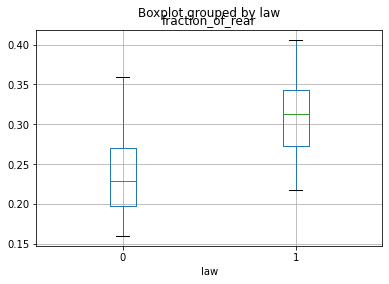

In [43]:
df.boxplot('fraction_of_rear', 'law')

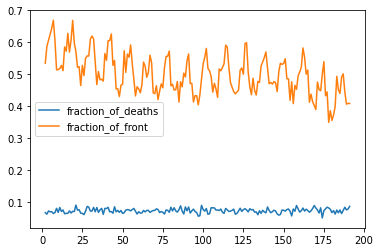

In [53]:
df = df.iloc[1:,8:11]
df.plot()

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

X=df[['FractionOfDriversKilled', 'kms']]  # Features
y=df['law'].astype('category')  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)

y_pred = myModel.predict([[0.1, 100]])[0]
y_pred


In [ ]:
from sklearn.metrics import classification_report
y_pred_proba = myModel.predict_proba(X)[:,1]
y_pred = myModel.predict(X)

# cr = classification_report(y, y_pred>0.15)
cr = classification_report(y, y_pred)
print(cr)